In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os               # with this we can read the full file name if needed
from csv import reader  #Package that reads the csv file

# Set style for plots
plt.style.use('fivethirtyeight') 

In [2]:
df_raw = pd.read_csv('./Data/data_extract_shipping_comma.csv')

In [ ]:
# check for duplicate rows, which there are none.
df_raw.duplicated()

In [4]:
df_raw.columns

Index(['shop_url', 'maincountry', 'sum', 'maincategory', 'Websales_2020_USD',
       'ShippingProvider_FR', 'ShippingProvider_GB', 'ShippingProvider_IT',
       'ShippingProvider_US', 'ShippingProvider_DE'],
      dtype='object')

In [5]:
# clean the column headings to use snake_case 
df_raw.rename(columns={'maincountry': 'main_country', 
                       'maincategory': 'main_category',
                       'Websales_2020_USD': 'websales_2020_usd',
                       'ShippingProvider_FR': 'shipping_provider_fr',
                       'ShippingProvider_GB': 'shipping_provider_gb',
                       'ShippingProvider_IT': 'shipping_provider_it',
                       'ShippingProvider_US': 'shipping_provider_us',
                       'ShippingProvider_DE': 'shipping_provider_de'
	  }, inplace=True)

In [7]:
# list all the unique items in shipping provider FR as a starting point
unique_values = df_raw['shipping_provider_fr'].unique()
print(unique_values)

[nan
 'chronopost, Colis Privé, GEODIS, La Poste, Mondial Relay, Own delivery service, Pilot, Relais Colis, Top Chrono'
 'Forwarding agent (not exactly named), Self-collection / Click & collect'
 'DPD, FedEx, GEODIS, GLS, Mazet' 'chronopost'
 'Forwarding agent (not exactly named), Own delivery service'
 'A2dis, chronopost, La Poste, Mondial Relay, Self-collection / Click & collect'
 'chronopost, La Poste, Mondial Relay, TNT' 'chronopost, La Poste'
 'La Poste, Mondial Relay' 'La Poste' 'La Poste, Relais Colis'
 'chronopost, GEODIS, La Poste, Self-collection / Click & collect'
 'chronopost, La Poste, Mondial Relay' 'La Poste, TNT'
 'chronopost, La Poste, Mondial Relay, Self-collection / Click & collect'
 'DHL, Forwarding agent (not exactly named), La Poste, TNT'
 'chronopost, La Poste, UPS (United Parcel Service)'
 'La Poste, Self-collection / Click & collect' 'DHL'
 'UPS (United Parcel Service)'
 'DPD, FedEx, La Poste, Mondial Relay, Self-collection / Click & collect, TNT'
 'chronopost,

In [8]:
# check for Null NaN values in a column, e.g. FR provider has 868 null values 
# which is to be expected, since not all shops have providers in all countries
df_raw['shipping_provider_fr'].isna().sum()

868

In [9]:
# fill the null values with a space '' string so we can count on them
df_raw['shipping_provider_fr'].fillna('', inplace=True)
df_raw['shipping_provider_gb'].fillna('', inplace=True)
df_raw['shipping_provider_it'].fillna('', inplace=True)
df_raw['shipping_provider_us'].fillna('', inplace=True)
df_raw['shipping_provider_de'].fillna('', inplace=True)

In [10]:
# Manually Split the column by comma and count the words
df_raw['word_count_fr'] = df_raw['shipping_provider_fr'].str.split(',').apply(len)

# Get the maximum word count for column FR
max_word_count = df_raw['word_count_fr'].max()

print(f"The maximum word count in the 'shipping_provider FR' column is: {max_word_count}")

The maximum word count in the 'shipping_provider FR' column is: 9


In [11]:
# Let's automate this for multiple columns using a loop
# List of columns to process
columns_to_process = ['shipping_provider_fr', 
                      'shipping_provider_gb', 
                      'shipping_provider_it', 
                      'shipping_provider_us', 
                      'shipping_provider_de']

# Initialize an empty dictionary to store results
max_word_counts = {}

# Iterate over each column
for col in columns_to_process:
    # Split the column by comma and count the words
    df_raw[f'word_count_{col}'] = df_raw[col].str.split(',').apply(len)
    
    # Get the maximum word count for this column
    max_word_counts[col] = df_raw[f'word_count_{col}'].max()

    # Print the result
    print(f"The maximum word count in the '{col}' column is: {max_word_counts[col]}")

The maximum word count in the 'shipping_provider_fr' column is: 9
The maximum word count in the 'shipping_provider_gb' column is: 6
The maximum word count in the 'shipping_provider_it' column is: 5
The maximum word count in the 'shipping_provider_us' column is: 7
The maximum word count in the 'shipping_provider_de' column is: 7


In [12]:
# make copy of DataFrame
df_expanded = df_raw.copy()

In [13]:
df_expanded.head(10)

,shop_url,main_country,sum,main_category,websales_2020_usd,shipping_provider_fr,shipping_provider_gb,shipping_provider_it,shipping_provider_us,shipping_provider_de,word_count_fr,word_count_shipping_provider_fr,word_count_shipping_provider_gb,word_count_shipping_provider_it,word_count_shipping_provider_us,word_count_shipping_provider_de
0,alternate.de,Germany,1,Electronics&Media,795226084,,,,,"Dachser,DHL,Forwardingagent(notexactlynamed),S...",1,1,1,1,1,4
1,bonprix.de,Germany,1,Fashion,699803450,,,,,"Hermes,Self-collection/Click&collect",1,1,1,1,1,2
2,shop.rewe.de,Germany,1,Food&PersonalCare,472062029,,,,,"Forwardingagent(notexactlynamed),Owndeliveryse...",1,1,1,1,1,3
3,limango.de,Germany,1,Fashion,355054539,,,,,Hermes,1,1,1,1,1,1
4,esprit.de,Germany,1,Fashion,249757529,,,,,"DHL,Hermes,Self-collection/Click&collect",1,1,1,1,1,3
5,jacob.de,Germany,1,Electronics&Media,249531388,,,,,"DHL,DPD,GLS,TNT,Trans-o-flex,UPS(UnitedParcelS...",1,1,1,1,1,6
6,medion.com,Germany,1,Electronics&Media,236505045,,,,,DHL,1,1,1,1,1,1
7,medimops.de,Germany,1,Electronics&Media,230671727,,,,,"DeutschePost,DHL,Hermes,PINMail",1,1,1,1,1,4
8,apotal.de,Germany,1,Food&PersonalCare,149076022,,,,,Notcommunicated,1,1,1,1,1,1
9,kfzteile24.de,Germany,1,"Toys,Hobby&DIY",144457396,,,,,"DHL,DPD,GO!Express&Logistics,Rieck",1,1,1,1,1,4


In [ ]:
# want to split now all the columns into new columns to separate the values into their own column
# e.g. so each provider is listed on its own for each shop

# Define the delimiter
# have to modify it from ', ' to ',' since it turns out Germany column does not have spaces after the comma
delimiter = ','
new_columns = {}

# Iterate over each column
for col in columns_to_process:
    # Split the column by the delimiter and put this into a new DF split_values
    split_values = df_expanded[col].str.split(delimiter, expand=True)
    
    # We take the shape of the new DF split_values to know the dimensions of the DataFrame. 
    # [1] index accesses the number of columns it outputs - determine the number of additional columns needed
    num_additional_columns = split_values.shape[1]
    
    # Create new column names with the desired naming convention. {col} refers to the current column names 
    # it then appends _x number as it iterates across the loop
    new_col_names = [f"{col}_{i+1}" for i in range(num_additional_columns)]
    
    # Assign the split values to the new columns
    split_values.columns = new_col_names
    
    # Store the new columns in the dictionary
    new_columns[col] = split_values

# Concatenate the new columns with the original DataFrame
df_expanded = pd.concat([df_expanded.drop(columns=columns_to_process), *new_columns.values()], axis=1)

### Check data output of new dataframe on Germany

In [15]:
# Filter rows where 'main_country' is Germany to check quality of data
# Germany rows is only going to show Germany data
germany_rows = df_expanded[df_expanded['main_country'] == 'Germany'].copy()

# Select columns containing '_de' in the column name
selected_columns = germany_rows.filter(like='_de').copy()

# Add the 'main_country' column too
selected_columns['main_country'] = germany_rows['main_country']

selected_columns.sample(15)

,word_count_shipping_provider_de,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7,main_country
35,4,DHL,Forwardingagent(notexactlynamed),Owndeliveryservice,Self-collection/Click&collect,None,None,None,Germany
194,2,DeutschePost,DHL,None,None,None,None,None,Germany
301,1,Notcommunicated,None,None,None,None,None,None,Germany
37,3,DHL,Self-collection/Click&collect,UPS(UnitedParcelService),None,None,None,None,Germany
77,1,DHL,None,None,None,None,None,None,Germany
28,3,DHL,Medonice,Self-collection/Click&collect,None,None,None,None,Germany
41,1,DHL,None,None,None,None,None,None,Germany
198,2,DHL,DPD,None,None,None,None,None,Germany
75,1,DHL,None,None,None,None,None,None,Germany
27,1,DHL,None,None,None,None,None,None,Germany


In [16]:
# noticed some rows for Germany have Notcommunicated as a shipping provider.
# check those specific row indexes so we can compare later they have been corrected
selected_rows1 = selected_columns.loc[[158, 299, 200]]
selected_rows1

,word_count_shipping_provider_de,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7,main_country
158,1,Notcommunicated,None,None,None,None,None,None,Germany
299,1,Notcommunicated,None,None,None,None,None,None,Germany
200,1,Notcommunicated,None,None,None,None,None,None,Germany


In [17]:
# we need to decide what to do with 'Notcommunicated' and 'Forwardingagent(notexactlynamed)'

#Notcommunicated is unhelpful so let's make this a blank string. 
df_expanded.replace("Notcommunicated", "", inplace=True)

# Check index 158, 200 and 299 for a quality check:
selected_rows = df_expanded.loc[[158, 299, 200]]
selected_rows

,shop_url,main_country,sum,main_category,websales_2020_usd,word_count_fr,word_count_shipping_provider_fr,word_count_shipping_provider_gb,word_count_shipping_provider_it,word_count_shipping_provider_us,...,shipping_provider_us_5,shipping_provider_us_6,shipping_provider_us_7,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7
158,doyoursports.de,Germany,1,"Toys,Hobby&DIY",3940841,1,1,1,1,1,...,None,None,None,,None,None,None,None,None,None
299,butch.de,Germany,1,Furniture&Appliances,737376,1,1,1,1,1,...,None,None,None,,None,None,None,None,None,None
200,peruvianconnection.de,Germany,1,Fashion,2766709,1,1,1,1,1,...,None,None,None,,None,None,None,None,None,None


### Continue cleanup on main dataframe

In [ ]:
# create a function to check for rows that have leading or trailing spaces
def has_leading_or_trailing_spaces(x):
    return isinstance(x, str) and (x != x.strip())

# Create a boolean DataFrame where True indicates the presence of leading or trailing spaces
spaces_bool_df = df_expanded.applymap(has_leading_or_trailing_spaces)

# Filter rows that have any True values (indicating spaces) in any column
rows_with_spaces = df_expanded[spaces_bool_df.any(axis=1)]

# Print the rows with leading or trailing spaces
#print(rows_with_spaces)

# show DF with no. of spaces = 379 rows
rows_with_spaces

In [21]:
# Remove leading and trailing spaces from our actual dataframe
df_expanded = df_expanded.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/w0/x5c38gm52cn6wl6j2d5rz2_c0000gn/T/ipykernel_4273/804367807.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_expanded = df_expanded.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [22]:
# show no. of rows and columns
df_expanded.shape

(985, 45)

In [23]:
df_expanded.columns

Index(['shop_url', 'main_country', 'sum', 'main_category', 'websales_2020_usd',
       'word_count_fr', 'word_count_shipping_provider_fr',
       'word_count_shipping_provider_gb', 'word_count_shipping_provider_it',
       'word_count_shipping_provider_us', 'word_count_shipping_provider_de',
       'shipping_provider_fr_1', 'shipping_provider_fr_2',
       'shipping_provider_fr_3', 'shipping_provider_fr_4',
       'shipping_provider_fr_5', 'shipping_provider_fr_6',
       'shipping_provider_fr_7', 'shipping_provider_fr_8',
       'shipping_provider_fr_9', 'shipping_provider_gb_1',
       'shipping_provider_gb_2', 'shipping_provider_gb_3',
       'shipping_provider_gb_4', 'shipping_provider_gb_5',
       'shipping_provider_gb_6', 'shipping_provider_it_1',
       'shipping_provider_it_2', 'shipping_provider_it_3',
       'shipping_provider_it_4', 'shipping_provider_it_5',
       'shipping_provider_us_1', 'shipping_provider_us_2',
       'shipping_provider_us_3', 'shipping_provider_us_4',

In [24]:
# now that we have expanded the columns for shipping modes and checked the word counts, we can remove the obsolete columns
df_stripped = df_expanded.drop(columns=df_expanded.filter(like='word_count').columns).copy()

# sum column is also of no value, as it has 1 across them all
df_stripped = df_stripped.drop(columns='sum')

In [25]:
# Let's check all the unique shipping mode names and check if we need to rename/clean any of them

# Filter columns that begin with "shipping_provider"
shipping_provider_columns = df_expanded.filter(like='shipping_provider')

# Concatenate and stack to get a Series of all values, then find unique values
unique_shipping_providers = pd.concat([shipping_provider_columns]).stack().unique()

# Print unique values
print("Unique values in columns beginning with 'shipping_provider':")
print(unique_shipping_providers)

Unique values in columns beginning with 'shipping_provider':
[1 4 '' 'Dachser' 'DHL' 'Forwardingagent(notexactlynamed)'
 'Self-collection/Click&collect' 2 'Hermes' 3 'Owndeliveryservice' 6 'DPD'
 'GLS' 'TNT' 'Trans-o-flex' 'UPS(UnitedParcelService)' 'DeutschePost'
 'PINMail' 'GO!Express&Logistics' 'Rieck' 'Medonice' 'Verhoek' 'FedEx'
 'GEL' 7 'Raben' 'DBSchenker' 'DiePost' 'RhenusLogistics' 5 'Emons'
 'Hellmann' 'Directdownload' 'Forwarding agent (not exactly named)'
 'Self-collection / Click & collect' 9 'chronopost' 'Colis Privé' 'GEODIS'
 'La Poste' 'Mondial Relay' 'Own delivery service' 'Pilot' 'Relais Colis'
 'Top Chrono' 'UPS (United Parcel Service)'
 'USPS (United States Postal Service)' 'OnTrac' 'Not communicated'
 'Bartolini (BRT)' 'Mazet' 'Ceva' 'Energo Logistic' 'InPost' 'DB Schenker'
 'GDN (Global Delivery Network)' 'Direct download' 'A2dis' 'Yodel'
 'Parcel Force' 'Royal Mail' 'Canada Post' 'EMS' 'Panther' 'SkyNet'
 'collect+' 'SDA (Poste Italiane)' 'Milkman' 'ParcelABC'
 

In [26]:
# rename Forwardingagent(notexactlynamed)
# rename Forwarding agent (not exactly named)
# rename Self-collection/Click&collect
# rename Self-collection / Click & collect
# rename Owndeliveryservice
# rename Own delivery service
# rename UPS(UnitedParcelService)
# rename UPS (United Parcel Service)
# rename GDN (Global Delivery Network)
# rename USPS (United States Postal Service)
# rename Directdownload
# remae DBSchenker
# rename chronopost

# Define the replacements
replacements = {
    "Forwardingagent(notexactlynamed)": "Forwarding agent",
    "Forwarding agent (not exactly named)": "Forwarding agent",
    "Self-collection/Click&collect": "Click & Collect",
    "Self-collection / Click & collect": "Click & Collect",
    "Owndeliveryservice": "Own delivery",
    "Own delivery service": "Own delivery",
    "UPS(UnitedParcelService)": "UPS",
    "UPS (United Parcel Service)": "UPS",
    "GDN (Global Delivery Network)": "GDN",
    "USPS (United States Postal Service)": "USPS",
    "Directdownload": "Direct download",
    'DBSchenker': "DB Schenker",
    "chronopost": "Chronopost"
}

# Replace values in the DataFrame
df_stripped = df_stripped.replace(replacements).copy()

In [27]:
#let's check again we have made all the necessary changes to the shipping modes

# Filter columns that begin with "shipping_provider"
shipping_provider_columns2 = df_stripped.filter(like='shipping_provider')

# Concatenate and stack to get a Series of all values, then find unique values
unique_shipping_providers2 = pd.concat([shipping_provider_columns2]).stack().unique()

# Print unique values
print("Unique values in columns beginning with 'shipping_provider':")
print(unique_shipping_providers2)

Unique values in columns beginning with 'shipping_provider':
['' 'Dachser' 'DHL' 'Forwarding agent' 'Click & Collect' 'Hermes'
 'Own delivery' 'DPD' 'GLS' 'TNT' 'Trans-o-flex' 'UPS' 'DeutschePost'
 'PINMail' 'GO!Express&Logistics' 'Rieck' 'Medonice' 'Verhoek' 'FedEx'
 'GEL' 'Raben' 'DB Schenker' 'DiePost' 'RhenusLogistics' 'Emons'
 'Hellmann' 'Direct download' 'Chronopost' 'Colis Privé' 'GEODIS'
 'La Poste' 'Mondial Relay' 'Pilot' 'Relais Colis' 'Top Chrono' 'USPS'
 'OnTrac' 'Not communicated' 'Bartolini (BRT)' 'Mazet' 'Ceva'
 'Energo Logistic' 'InPost' 'GDN' 'A2dis' 'Yodel' 'Parcel Force'
 'Royal Mail' 'Canada Post' 'EMS' 'Panther' 'SkyNet' 'collect+'
 'SDA (Poste Italiane)' 'Milkman' 'ParcelABC' 'APC Postal Logistics'
 'France Express' 'trusk' 'VIR Transport' 'P2P' 'UK Mail' 'Posti' 'Aramex'
 'China Post' 'International Bridge' 'LaserShip' 'Bpost' 'Japan Post'
 'OCS Worldwide' 'MRW' 'Guisnel' 'Henri Ducros' 'Kühne + Nagel' 'PostNord'
 'Fercam' 'DX (Delivered Exactly)' 'Shoprunner']


In [28]:
# now we have a final DataFrame / sheet with all the correct columns needed and now cleaned
df_stripped.head(5)

,shop_url,main_country,main_category,websales_2020_usd,shipping_provider_fr_1,shipping_provider_fr_2,shipping_provider_fr_3,shipping_provider_fr_4,shipping_provider_fr_5,shipping_provider_fr_6,...,shipping_provider_us_5,shipping_provider_us_6,shipping_provider_us_7,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7
0,alternate.de,Germany,Electronics&Media,795226084,,None,None,None,None,None,...,None,None,None,Dachser,DHL,Forwarding agent,Click & Collect,None,None,None
1,bonprix.de,Germany,Fashion,699803450,,None,None,None,None,None,...,None,None,None,Hermes,Click & Collect,None,None,None,None,None
2,shop.rewe.de,Germany,Food&PersonalCare,472062029,,None,None,None,None,None,...,None,None,None,Forwarding agent,Own delivery,Click & Collect,None,None,None,None
3,limango.de,Germany,Fashion,355054539,,None,None,None,None,None,...,None,None,None,Hermes,None,None,None,None,None,None
4,esprit.de,Germany,Fashion,249757529,,None,None,None,None,None,...,None,None,None,DHL,Hermes,Click & Collect,None,None,None,None


In [32]:
# Format websales column into numeric 
df_stripped['websales_2020_usd'] = pd.to_numeric(df_stripped['websales_2020_usd'])

In [35]:
# Show unique values in the "main_country" column to double check for duplications
unique_countries = df_stripped['main_country'].unique()
unique_countries

array(['Germany', 'United States', 'France', 'United Kingdom', 'Italy'],
      dtype=object)

### Spot check on France as another quality check

In [36]:
# Let's check France Data

# Filter rows where 'main_country' is France to check quality of data
# Germany rows is only going to show Germany data
france_rows_final = df_stripped[df_stripped['main_country'] == 'France'].copy()

# Select columns containing '_de' in the column name
selected_columns = france_rows_final.filter(like='_fr').copy()

# Add the 'main_country' column too
selected_columns['main_country'] = france_rows_final['main_country']

selected_columns.sample(8)

,shipping_provider_fr_1,shipping_provider_fr_2,shipping_provider_fr_3,shipping_provider_fr_4,shipping_provider_fr_5,shipping_provider_fr_6,shipping_provider_fr_7,shipping_provider_fr_8,shipping_provider_fr_9,main_country
605,Not communicated,None,None,None,None,None,None,None,None,France
638,DPD,La Poste,TNT,None,None,None,None,None,None,France
494,La Poste,Click & Collect,None,None,None,None,None,None,None,France
946,Forwarding agent,Click & Collect,None,None,None,None,None,None,None,France
407,La Poste,Mondial Relay,None,None,None,None,None,None,None,France
735,DPD,La Poste,None,None,None,None,None,None,None,France
484,Chronopost,La Poste,UPS,None,None,None,None,None,None,France
569,DPD,Relais Colis,Click & Collect,UPS,None,None,None,None,None,France


# VISUALISATIONS

## Grouping and visualising Providers in Germany

In [37]:
de_provider_columns = ['shipping_provider_de_1', 'shipping_provider_de_2', 'shipping_provider_de_3',
                    'shipping_provider_de_4', 'shipping_provider_de_5', 'shipping_provider_de_6',
                    'shipping_provider_de_7']

germany_df = df_stripped[df_stripped['main_country'] == 'Germany']

### Shipping providers most used in Germany

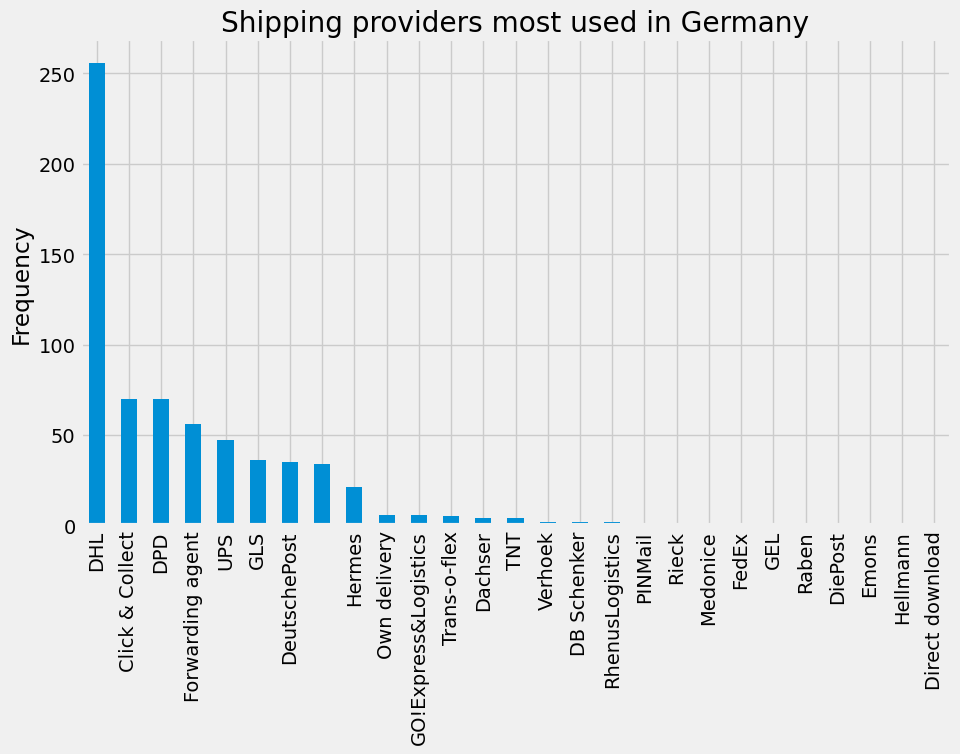

In [38]:
# Combine data from all provider columns into a single list
all_providers = germany_df[de_provider_columns].values.flatten()

# Count the frequency of each provider
provider_counts = pd.Series(all_providers).value_counts()
#provider_counts

# Create a bar chart
plt.figure(figsize=(10, 6))
provider_counts.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Shipping providers most used in Germany')
plt.show()

### Providers most used across different categories


In [39]:
new_column = 'main_category'
de_provider_columns.append(new_column)

grouped_providers_cat = germany_df[de_provider_columns]
grouped_providers_cat

,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7,main_category
0,Dachser,DHL,Forwarding agent,Click & Collect,None,None,None,Electronics&Media
1,Hermes,Click & Collect,None,None,None,None,None,Fashion
2,Forwarding agent,Own delivery,Click & Collect,None,None,None,None,Food&PersonalCare
3,Hermes,None,None,None,None,None,None,Fashion
4,DHL,Hermes,Click & Collect,None,None,None,None,Fashion
...,...,...,...,...,...,...,...,...
336,DHL,Forwarding agent,Click & Collect,None,None,None,None,Furniture&Appliances
337,DHL,GLS,None,None,None,None,None,Furniture&Appliances
338,DHL,Hermes,Click & Collect,None,None,None,None,Fashion
339,DPD,None,None,None,None,None,None,"Toys,Hobby&DIY"


In [42]:
# Melt the DataFrame to combine all provider columns into a single column
df_melted = grouped_providers_cat.melt(id_vars=['main_category'], value_vars=[
    'shipping_provider_de_1', 'shipping_provider_de_2', 'shipping_provider_de_3',
    'shipping_provider_de_4', 'shipping_provider_de_5', 'shipping_provider_de_6',
    'shipping_provider_de_7'], value_name='provider')

# Filter out the 'None' values
df_filtered = df_melted[df_melted['provider'] != 'None']

# Group by 'main_category' and 'provider' and count occurrences
provider_counts = df_filtered.groupby(['main_category', 'provider']).size().reset_index(name='count')
provider_counts.sample(8)

,main_category,provider,count
32,Food&PersonalCare,DPD,10
21,Fashion,FedEx,1
46,Furniture&Appliances,Dachser,1
34,Food&PersonalCare,Forwarding agent,3
7,Electronics&Media,Forwarding agent,4
19,Fashion,DPD,7
53,Furniture&Appliances,RhenusLogistics,1
26,Fashion,Trans-o-flex,1


<Figure size 3000x1500 with 0 Axes>

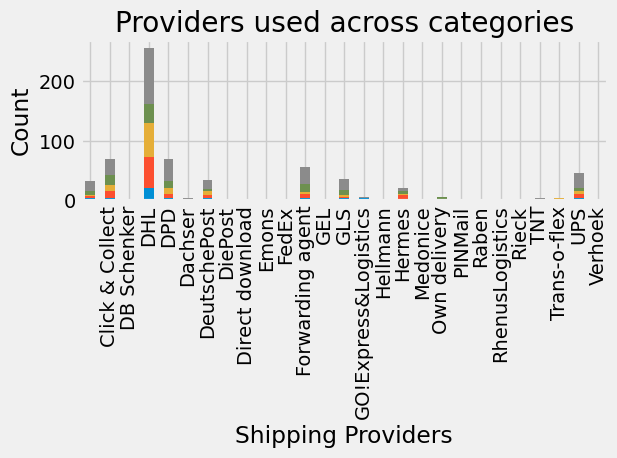

In [43]:
# Set up the plot
plt.figure(figsize=(30, 15))

# Create the bar plot
provider_counts.pivot(index='provider', columns='main_category', values='count').plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Shipping Providers')
plt.ylabel('Count')
plt.title('Providers used across categories')
#plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend().remove()

plt.tight_layout()

# Show the plot
plt.show()

In [44]:
# convert Dataframes to csv file
#provider_counts.to_csv('provider_counts.csv', index=False)
#df_stripped.to_csv('all_providers_cleaned.csv', index=False)
df_stripped.sample(6)

,shop_url,main_country,main_category,websales_2020_usd,shipping_provider_fr_1,shipping_provider_fr_2,shipping_provider_fr_3,shipping_provider_fr_4,shipping_provider_fr_5,shipping_provider_fr_6,...,shipping_provider_us_5,shipping_provider_us_6,shipping_provider_us_7,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7
331,evematratze.de,Germany,Furniture&Appliances,0,,None,None,None,None,None,...,None,None,None,DHL,DPD,None,None,None,None,None
709,sunglasses-shop.co.uk,United Kingdom,Fashion,5996999,,None,None,None,None,None,...,None,None,None,,None,None,None,None,None,None
154,kaerchershop-schreiber.de,Germany,Furniture&Appliances,4027942,,None,None,None,None,None,...,None,None,None,DHL,None,None,None,None,None,None
954,elementjewellery.com,United Kingdom,Fashion,86643,,None,None,None,None,None,...,None,None,None,,None,None,None,None,None,None
726,maison-energy.com,France,Furniture & Appliances,5380010,Not communicated,None,None,None,None,None,...,None,None,None,,None,None,None,None,None,None
305,trauerdruckportal.de,Germany,"Toys,Hobby&DIY",571789,,None,None,None,None,None,...,None,None,None,DeutschePost,DHL,UPS,None,None,None,None


## Combined comparisons

### which providers have the largest reach?


In [45]:
df_reach = df_stripped.drop(columns=['shop_url', 'main_category', 'websales_2020_usd'])
df_reach.sample(5)

,main_country,shipping_provider_fr_1,shipping_provider_fr_2,shipping_provider_fr_3,shipping_provider_fr_4,shipping_provider_fr_5,shipping_provider_fr_6,shipping_provider_fr_7,shipping_provider_fr_8,shipping_provider_fr_9,...,shipping_provider_us_5,shipping_provider_us_6,shipping_provider_us_7,shipping_provider_de_1,shipping_provider_de_2,shipping_provider_de_3,shipping_provider_de_4,shipping_provider_de_5,shipping_provider_de_6,shipping_provider_de_7
949,United Kingdom,,None,None,None,None,None,None,None,None,...,None,None,None,,None,None,None,None,None,None
465,France,Chronopost,La Poste,Mondial Relay,None,None,None,None,None,None,...,None,None,None,,None,None,None,None,None,None
764,United States,,None,None,None,None,None,None,None,None,...,None,None,None,,None,None,None,None,None,None
17,Germany,,None,None,None,None,None,None,None,None,...,None,None,None,DHL,None,None,None,None,None,None
189,Germany,,None,None,None,None,None,None,None,None,...,None,None,None,DHL,None,None,None,None,None,None


In [47]:
# Melt the DataFrame: First, melt the DataFrame to transform the wide format (with separate columns for each shipping provider)
# into a long format (with a single column for shipping providers and another column for the corresponding country).

melted_reach = pd.melt(df_reach, id_vars=["main_country"], value_vars=df_reach.columns[1:])

# Group by country and shipping provider, then count the frequency
provider_counts = melted_reach.groupby(["main_country", "value"])["variable"].count()

# Reset the index to make it a DataFrame
provider_counts_df = provider_counts.reset_index()

# Rename the columns for clarity
provider_counts_df.columns = ["Country", "Shipping Provider", "Frequency"]

# Sort by frequency in descending order
sorted_provider_counts = provider_counts_df.sort_values(by="Frequency", ascending=False)
sorted_provider_counts.sample(10)

,Country,Shipping Provider,Frequency
67,Italy,Hermes,1
11,France,France Express,3
20,France,Mondial Relay,24
110,United States,DB Schenker,1
127,United States,SkyNet,1
124,United States,Posti,1
95,United Kingdom,Parcel Force,6
108,United States,China Post,1
6,France,DB Schenker,3
113,United States,Direct download,2


In [ ]:
# convert Dataframe to csv file
#sorted_provider_counts.to_csv('all_providers_country.csv', index=False)

### What shops with the largest sales use which providers?

In [48]:
# Melt the DataFrame to combine all shipping provider columns into a single column
shipping_columns = [col for col in df_stripped.columns if col.startswith('shipping_provider')]
melted_df_sales = pd.melt(df_stripped, id_vars=['shop_url', 'main_country', 'main_category', 'websales_2020_usd'], value_vars=shipping_columns, value_name='shipping_provider').copy()

# Drop rows with NaN values in the 'shipping_provider' column
melted_df_sales = melted_df_sales.dropna(subset=['shipping_provider'])

# Convert websales to numeric
# use this is dollar signs are included: melted_df_sales['websales_2020_usd'] = melted_df_sales['websales_2020_usd'].replace('[\$,]', '', regex=True).astype(float)
melted_df_sales['websales_2020_usd'] = pd.to_numeric(melted_df_sales['websales_2020_usd'])

melted_df_sales.head(5)

,shop_url,main_country,main_category,websales_2020_usd,variable,shipping_provider
0,alternate.de,Germany,Electronics&Media,795226084,shipping_provider_fr_1,
1,bonprix.de,Germany,Fashion,699803450,shipping_provider_fr_1,
2,shop.rewe.de,Germany,Food&PersonalCare,472062029,shipping_provider_fr_1,
3,limango.de,Germany,Fashion,355054539,shipping_provider_fr_1,
4,esprit.de,Germany,Fashion,249757529,shipping_provider_fr_1,


In [ ]:
#melted_df_sales.to_csv('all_data_pivot_sales.csv', index=False)